In [1]:
import os
import re
import pickle
#import pandas as pd
import numpy as np
import warnings
import pickle
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim
import gensim.corpora as corpora
from gensim.matutils import Sparse2Corpus
from tqdm import tqdm
from doc_from_topics import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

ModuleNotFoundError: No module named 'gensim'

In [62]:
## get the dataframe

with open(f"../data/modeling/topic_dfs/topic_dfsH2_submissions_30.pkl", "rb") as f: 
    data = pickle.load(f)


In [64]:
## get the model

models = load_pickle("H2_submissions_b0.1_a0.01", "model")


In [65]:
## Get specific model
model = models["a0.01_b0.1_k30"]

In [66]:
model.get_term_topics("security", minimum_probability=0.0005)

[(2, 0.006483909),
 (7, 0.0005696766),
 (22, 0.0015319518),
 (24, 0.001235791),
 (26, 0.004410122),
 (27, 0.0012114715),
 (29, 0.009843452)]

In [69]:
security_query = query_topic(data, 100000, "security", topic = False)

In [70]:
#topics to look out for, as they have security as a keyword:

set(security_query[security_query["Keywords"].str.contains("security")]["Dominant_Topic"])

{2.0, 29.0}

In [76]:
## Camera topics

cam_sub = data[data["Keywords"].str.contains("camera")]

## It is only topic 29 which has camera in it

topic_df = topic_threshold(data, 29, 0.9) #subset of 0.9

topic_df["Text"].sample(10).values

array(['Effective Time-saving SEO Practices ',
       'Cheap Walmart tablet mount  This is a samsung 7 in tablet but you can cut the frame to fit any tablet\r\n',
       'software on wall mounted tablet [removed]',
       'For Those Looking For Wireless Home Security Camera System, Arlo Pro Is On Sale At Lowest Price Ever [deleted]',
       'For those of you with wall mounted iPads: [deleted]',
       'Save Space in your Home with these Ideas ',
       'Considerations for a home security camera system [removed]',
       'Arlo Pro 2 Wireless Home Security Camera System [removed]',
       'How to install a car mirror ',
       'Save 40% on Arlo Pro - Wireless Home Security Camera System with Siren | Rechargeable, Night vision, Indoor/Outdoor, HD Video, 2-Way Audio, Wall Mount | Cloud Storage Included | 3 camera kit (VMS4330) '],
      dtype=object)

In [77]:
topic_df = topic_threshold(data, 2, 0.9)
topic_df["Text"].sample(10).values

#Mostly this is about garage doors and security systems concerning these doors

array(['Vivint Security System The Answer to Modern Day Security Problems ',
       '[Help/Advice][DIY] Setting up a new system at home [removed]',
       'Looking to Completely Replace Old Garage Door System The garage door system in my garage is broken so I’m looking to completely replace it. I’d like the new one to have smart capabilities but also retain all typical functions (a key pad outside, button inside, and door openers in our cars). Any recommendations?',
       "Replacing Vivint security system My contract is finally up on my vivint panel and I want to replace it with something that can be customized. I have the vivint door bell, and thermostat, with some z-wave devices and sensors. I want to integrate more cameras and my garage door opener with it. I would like to keep as many devices as possible, what is a good system to switch to? I don't have a preference on who the monitoring service is with. Thanks for any suggestions.",
       'Looking for whole home, one or multiple

In [79]:
## Let us do the same, but restrict the data to contain security and see how it is used:

topic_df = query_topic(data, 10, "security", topic = 2)["Text"].values
topic_df

## Mostly concerned with security systems for their home

array(["Looking for video doorbell as well as security camera options for parent's house My mom and step dad (60s) have just moved to a new house. They are in a very safe neighborhood, but their front door has no peephole and no windows to look out and see who is at the door. Normally I wouldn't be concerned, but my step dad's mom (80s) has gone completely r/JustNoMIL with threats against my mom and calling my step dad non stop to just yell at him about nonsense. She lives close to their house and, while hey son wants nothing to do with her, it's totally within her realm to show up unannounced. I just want them to be able to know who is at the door, but I'm also interested in getting them some security cameras for the back screened in porch and a few other windows. I'm not super tech savvy, but with instruction and YouTube I can figure most things out so I'm wondering what's my best option for something they will be able to use easily and will keep them safe.",
       "Replacing Vivint

In [80]:
## Let us do the same, but restrict the data to contain security and see how it is used:

topic_df = query_topic(data, 10, "security", topic = 7)["Text"].values
topic_df

## Mentions of security camera, but also other senses. Here is one guy with the more abstract notion of security.

array(['Arduino to simulate pressing button? So I live out in Asia now and have a garage that I would like to be able to automate/control from my phone so I don’t have to carry a bunch of these controllers everywhere I go. Can’t utilize any prebuilt stuff since the garage controllers are non-standardized and use undocumented RF and from what I understand a “Rolling code” security. \n\nI’m very new to arduino but I do have some basic programming skills, would like to ask if automating the key press is possible using arduino to simulate a key press on the physical remote (using servo) or soldering to close the circuit on the remote? \n\n I’ve done some research and it seems similar things have been done before. Hope someone can give me a little guidance if this is a feasible project for me to learn with some arduino kits. Parts are a plenty here but I don’t have a support group locally to help me\n\nThank you!',
       "Help with a starting point that is local network based. Could someon

In [81]:
topic_df = query_topic(data, 10, "security", topic = 29)["Text"].values
topic_df

## Security cameras (!!!) 

array(['Question about home security cameras I have recently purchased a wifi camera for in the home: [This one](https://www.amazon.com/D-Link-Camera-DCS-5020L-Certified-Refurbished/dp/B06Y3JWP5Y/ref=sr_1_3?ie=UTF8&amp;qid=1505839801&amp;sr=8-3&amp;keywords=d-link+camera).\n\nCan anybody tell me if there\'s a good, free, way to set this up so it records and saves ~12 hours of video. I have a spare PC in my house with about 1 TB of hard disk space. It would be neat if I could have it automatically save some video, however much is possible with that PC.\n\nThanks in advance! Thanks, it looks like i can download it, or purchase the "LE" or Full Version? Do I need purchase in order to use it? Or does it work with a free download? Are you British? Cool, thank you for this!',
       "Weather/Timelapse Webcam? I'm trying to find the best outdoor PoE webcam to be able to capture still images of landscape.  Unfortunately, everything I find seems to be video/security cameras.  I'd rather get a c

Overall: 
We find clear indications of users using security almost exclusively in relation to security cameras and security systems. They do not use security to pinpoint a worry concerning data use by companies. 

In [82]:
## Just to show that trust and privacy is not a thing:

privacy = query_topic(data, 100000, "privacy", topic = False)

<AxesSubplot:>

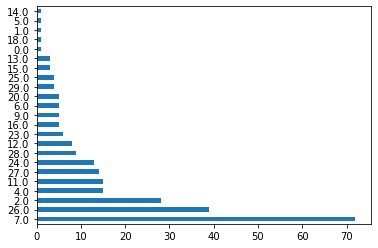

In [83]:
privacy['Dominant_Topic'].value_counts().plot(kind='barh') #baserate

In [102]:
print(privacy["Text"].sample(1).values)

["Home security, a live studio audience. So we all know how Facebook sells our user data like many companies. The saying goes if it's free then you are the product.\n\n\nSo how does that work with free/pay for premium cameras etc.\n\nIf you are paying for a premium service should companies be forced to forfeit data completely to you? No sleep mind wandering questions. Seriously, if you pay and another person doesn't shouldn't you have the right to privacy of data. "]


In [85]:
trust = query_topic(data, 100000, "trust", topic = False)

<AxesSubplot:>

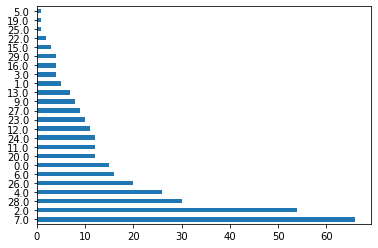

In [86]:
trust['Dominant_Topic'].value_counts().plot(kind='barh') #baserate

In [99]:
trust["Text"].sample(1).values

array(["Need some advice on getting started Hey all,\n\nRight now I only have a Google Home mini and plan on purchasing more to surround my house. I recently got this itch to automate my home and have already started researching. From what I can gather you need a hub that connects to your devices and your assistant, I'm not sure if there's a single best one at the moment though. I want a few things in my house at the moment, I listed my potential brands I will buy\n\n* Dimmable lights whether through switch or light bulb (Sengled or Zooz switches)\n* Motion sensed lights (?)\n* Smart thermostat (Nest)\n* Smart doorlock (Nest x Yale)\n* A garage door that opens when I get within X distance from my house? If that's possible (Chamberlain?)\n* A robot vacuum that can be controlled via Google Home? (Not sure which brands do this)\n* A hub (Wink)\n\nI think I mostly figured out what I'm doing? I plan on buying any hub like a Wink or SmartThings or doing the HomeAssistant on a raspberry pi. T

In [90]:
#Absolute and percent docs containing different keywords:
print(f"Amount of docs containing 'privacy': {len(privacy)} out of {len(data)} corresponding to {len(privacy)/len(data) * 100:.2f}%")
print(f"Amount of docs containing 'trust': {len(trust)} out of {len(data)} corresponding to {len(trust)/len(data) * 100:.2f}%")
print(f"Amount of docs containing 'security': {len(security_query)} out of {len(data)} corresponding to {len(security_query)/len(data) * 100:.2f}%")

Amount of docs containing 'privacy': 258 out of 52115 corresponding to 0.50%
Amount of docs containing 'trust': 333 out of 52115 corresponding to 0.64%
Amount of docs containing 'security': 2803 out of 52115 corresponding to 5.38%


Lets have a more detailed look at the most interesting topics concerning security (2,7,29):


In [55]:
corpus = load_pickle("H2_submissions_corpus", "corpus")
dictionary = load_pickle("H2_submissions_dct", "corpus")
from collections import Counter

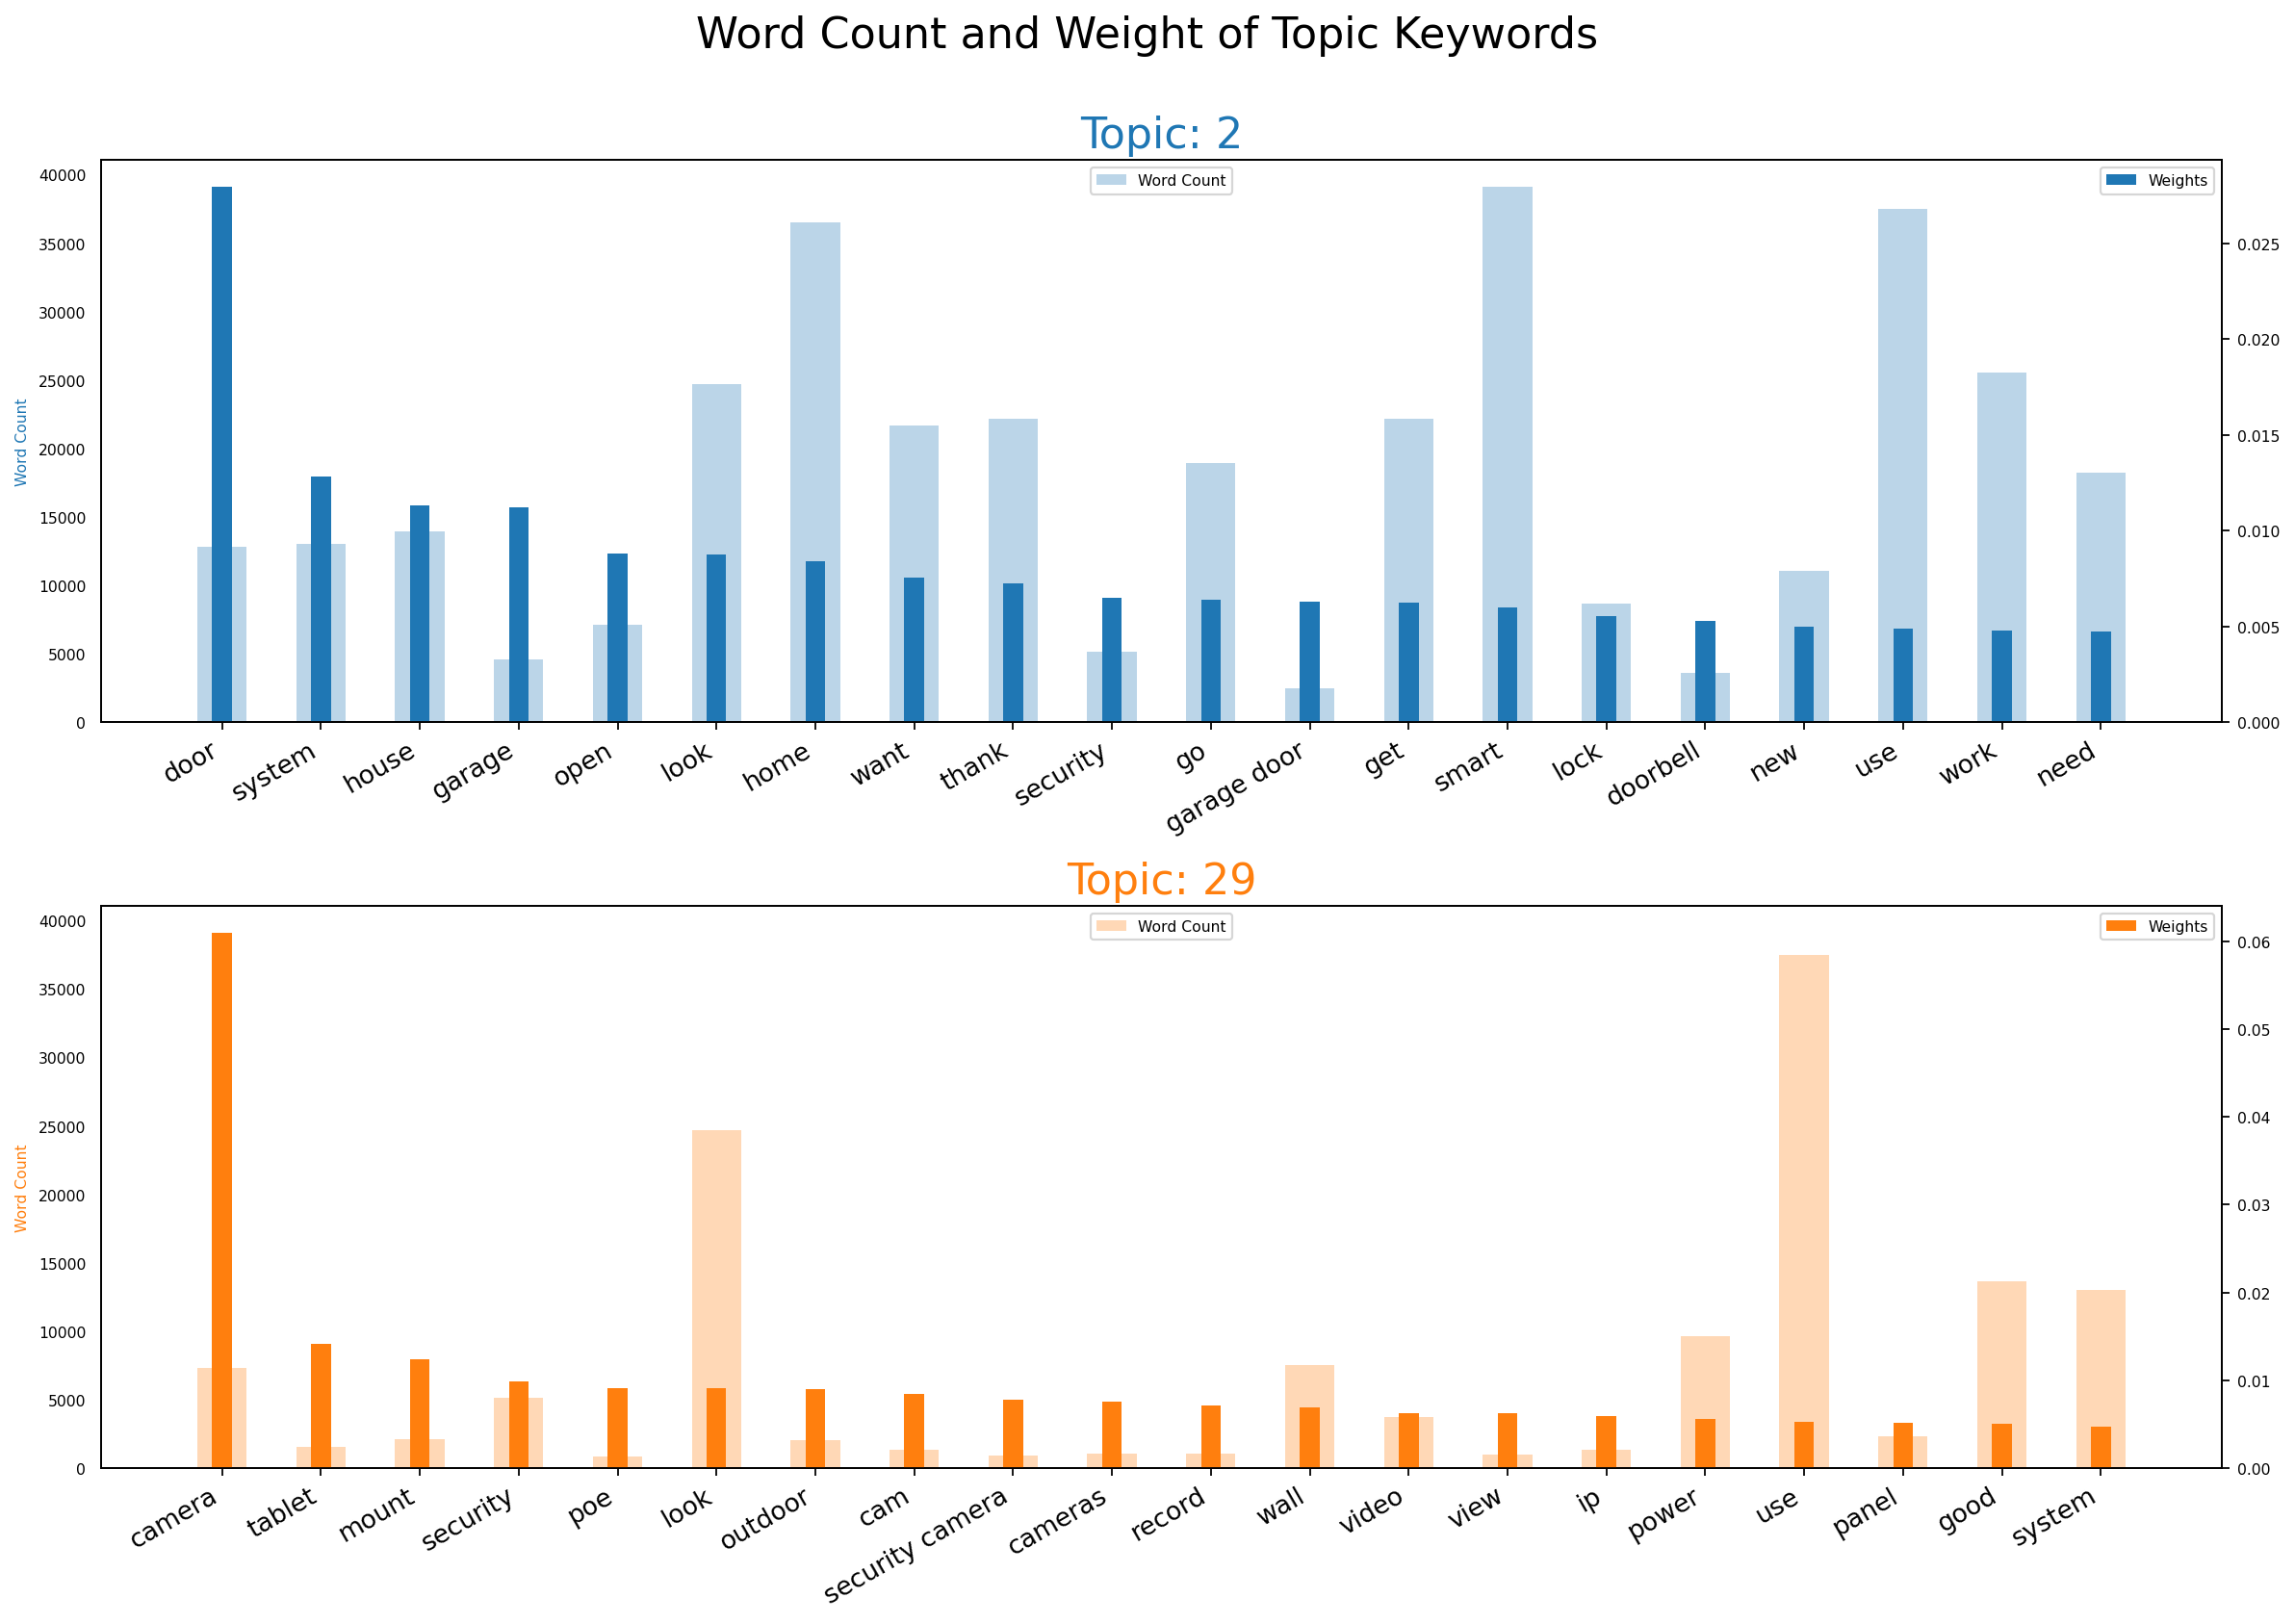

In [58]:
# Keep an eye on common words that occur in multiple topics and the one
# whose relative frequency is more than the weight. >> those should be added to stop_words

topics = model.show_topics(num_topics = 30, num_words = 20, formatted=False)
topics = [(x, dist) for (x, dist) in topics if x in [2, 29]]
topic_num = [x for (x, dist) in topics]


def corpus2token_text(corpus, dictionary):
    nested_doc = []
    texts = []
    for doc in corpus:
        nested_doc.append([[dictionary[k]]*v for (k, v) in doc])
    for doc in nested_doc:
        texts.append([item for sublist in doc for item in sublist])
    return texts

texts = corpus2token_text(corpus, dictionary)

data_flat = [word for doc in texts for word in doc]

# words stored as dict keys and their count as dict values
counter = Counter(data_flat)

out = []
for num, dist in topics:
    # relative weight to the topic
    for word, weight in dist:
        out.append([word, num, weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'weight', 'word_count'])    

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 1, figsize=(15,10), sharey=True, dpi=160)
cols = list(list(mcolors.TABLEAU_COLORS.values())*2)
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==topic_num[i], :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="weight", data=df.loc[df.topic_id==topic_num[i], :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i], fontsize=7)
    #ax_twin.set_ylim(0.0001, 0.0500); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(topic_num[i]), color=cols[i], fontsize=20)
    ax.tick_params(axis='y', left=False, labelsize=7)
    ax_twin.tick_params(axis='y', labelsize=7)
    ax.set_xticklabels(df.loc[df.topic_id==topic_num[i], 'word'], rotation=30, horizontalalignment= 'right', fontsize=12)
    ax.legend(loc='upper center', fontsize=7); ax_twin.legend(loc='upper right', fontsize=7)

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Weight of Topic Keywords', fontsize=20, y=1.05)
plt.savefig("../Figure/H2_topic_weight_prelim.png")    
plt.show()